# EDA & Modelling

## Package loading

In [3]:
from EZS_func import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.features import pca_decomposition
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.target.feature_correlation import feature_correlation
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import to_graphviz
from polylearn import PolynomialNetworkClassifier
from polylearn import FactorizationMachineClassifier
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping


## Exploratory Data Analysis 

### File and parameters loading

In [4]:
problem_type = 'classification'

In [5]:
stacking = 'True'

In [6]:
data_size = 'small'

In [7]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.6/dataset/diabetes2.csv')

In [8]:
target_col = 'Outcome'

In [9]:
user_drop_cols = []

In [10]:
threshold_NaN = 0.5

In [11]:
threshold_cat = 2

In [12]:
threshold_Z = 3.0

#### Dataset copy

In [13]:
df_copy = df.copy()

### Dataset Information

In [14]:
df.shape

(768, 9)

#### Some records

In [15]:
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Dataframe structure

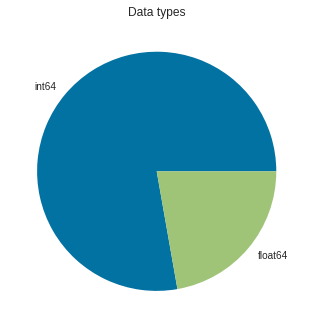

In [16]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [17]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Which columns could be categorical ?

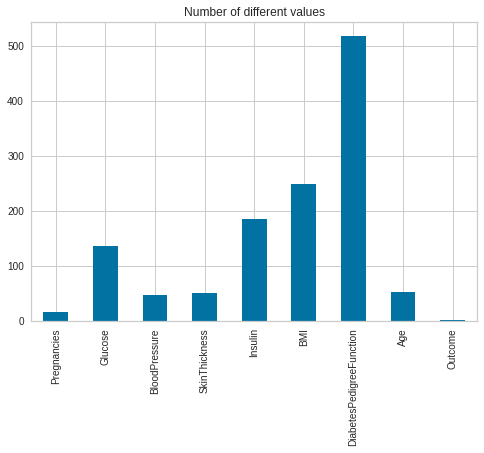

In [18]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [19]:
duplicates(df)

No duplicate rows.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Drop user's columns:

In [20]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [21]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [22]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [23]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [24]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [25]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: Pregnancies
Encoding numeric column: Glucose
Encoding numeric column: BloodPressure
Encoding numeric column: SkinThickness
Encoding numeric column: Insulin
Encoding numeric column: BMI
Encoding numeric column: DiabetesPedigreeFunction
Encoding numeric column: Age
Column  Outcome  is categorical.


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


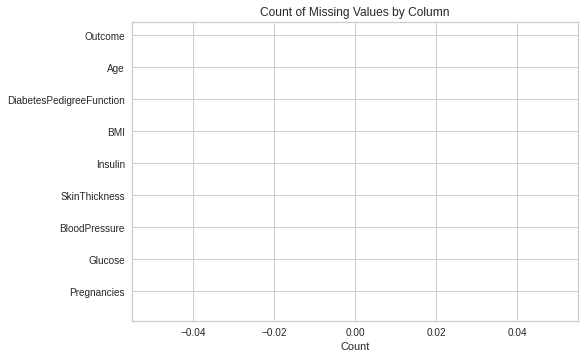

In [26]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [27]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [28]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.05MB
Memory usage after optimization is: 0.01MB
Decreased by 76.2%


##### Dataframe structure after compression

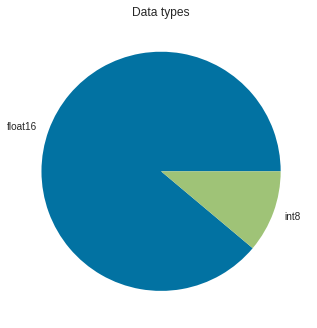

In [29]:
plot_dataframe_structure(df)

#### Outliers:

In [30]:
df = outliers(df, threshold_Z)

Using Z_score,  80  rows will be suppressed.


#### Splitting dataframe in features and targets

In [31]:
y = df[target_col]

In [32]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

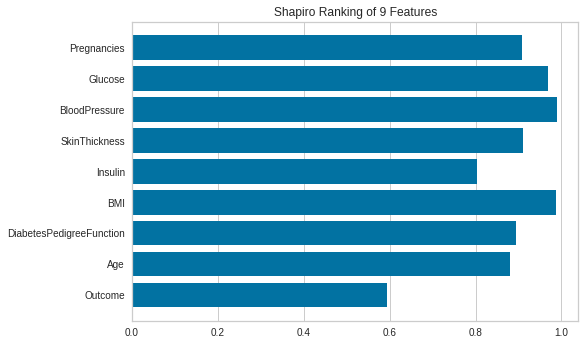

In [33]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

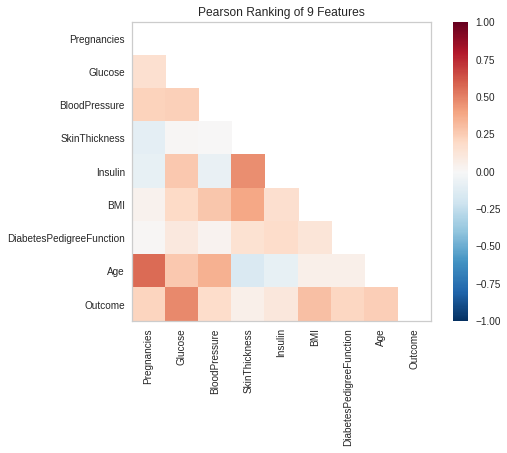

In [34]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

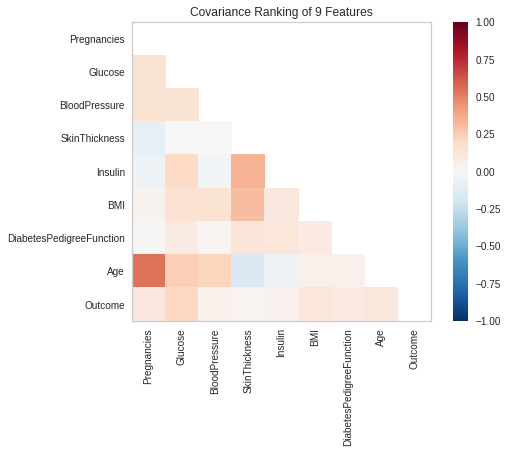

In [35]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

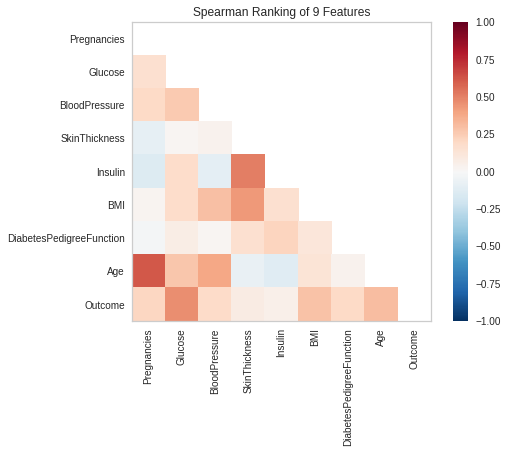

In [36]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

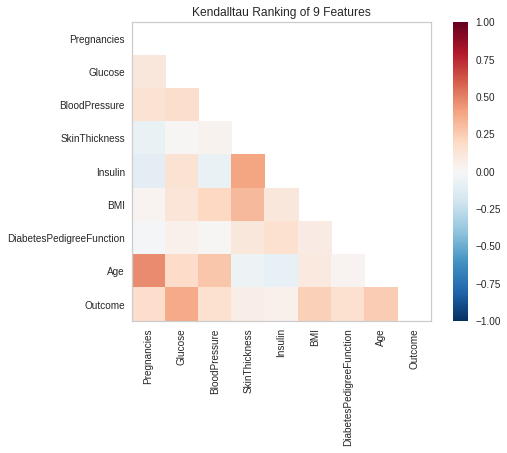

In [37]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

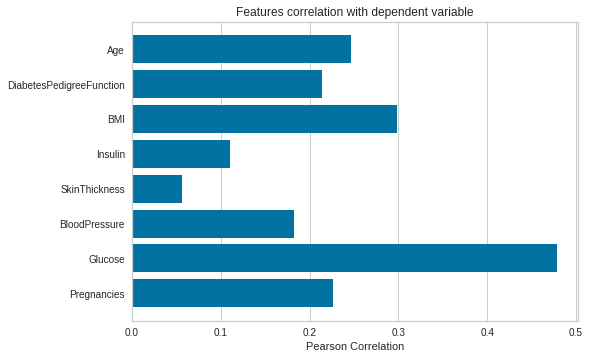

In [38]:
feature_correlation(X, y);

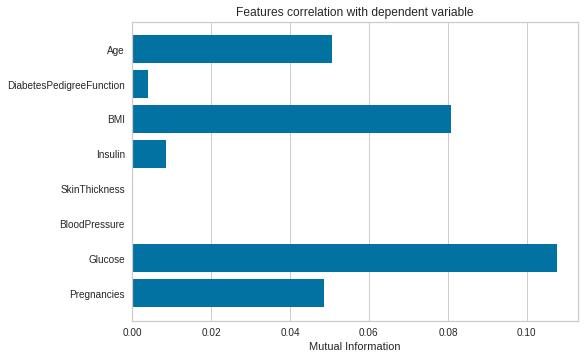

In [39]:
feature_correlation(X, y, method='mutual_info-classification');

##### Correlation with Seaborn

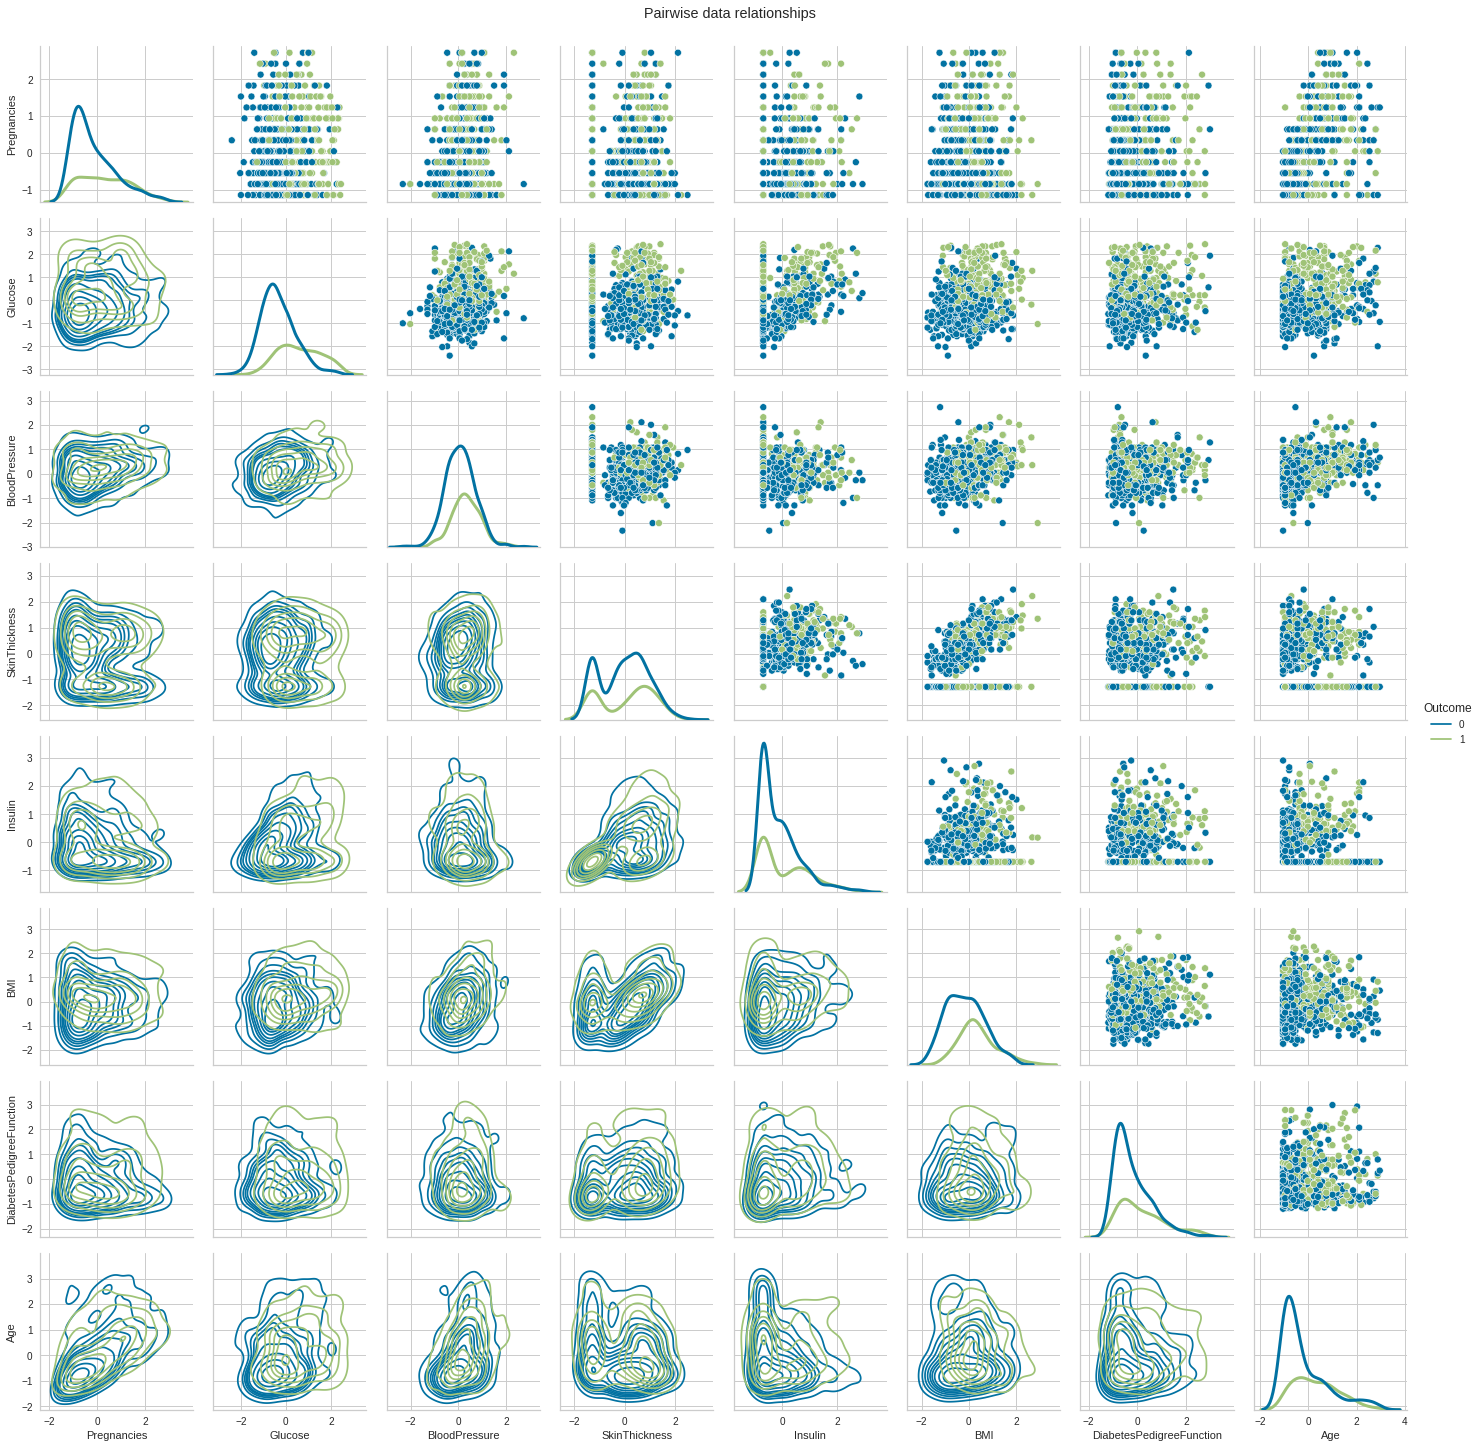

In [40]:
plot_sns_corr_class(df, target_col)

##### Heatmap with Seaborn

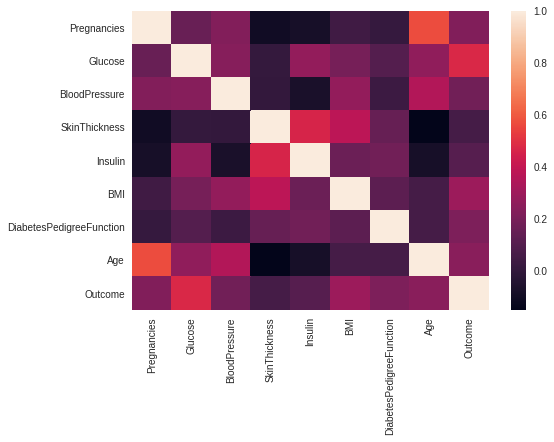

In [41]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

#### Feature importance (a priori)

##### According to decision tree

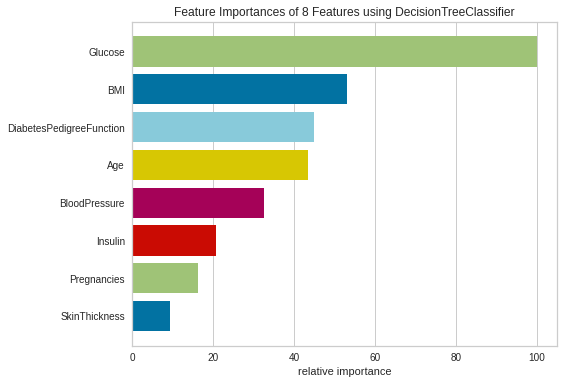

In [42]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

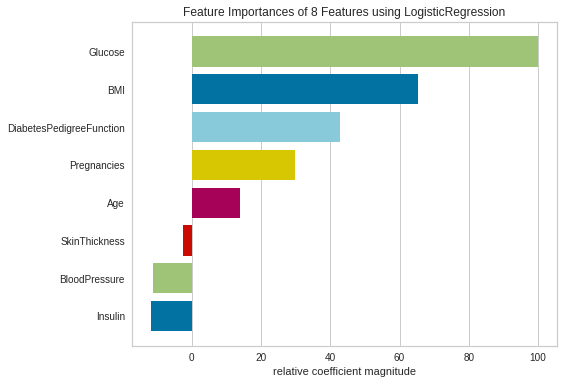

In [43]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

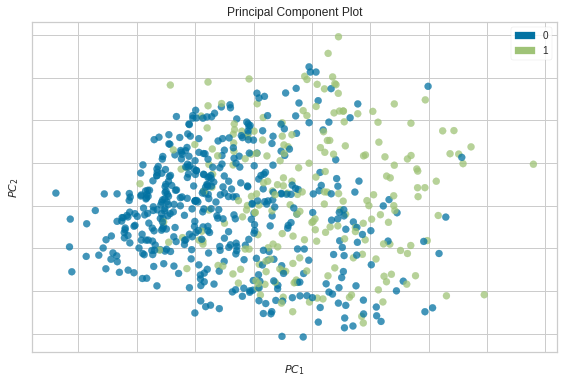

In [44]:
pca_decomposition(X, y.astype(int));

#### Class balancing

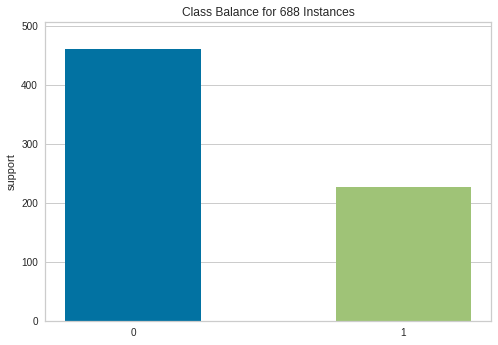

Entropy =  0.9148669608751177


In [45]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

## Splitting data in train and test sets 

In [46]:
df = df_copy

#### Splitting dataframe in features and targets

In [47]:
y = df[target_col]

In [48]:
X = df.drop(target_col, axis=1)

In [49]:
y = pd.Series(LabelEncoder().fit_transform(y))

In [50]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [51]:
cat_selector = make_column_selector(dtype_include=object)

In [52]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [53]:
cat_tree_processor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [54]:
num_tree_processor = SimpleImputer(strategy='mean', add_indicator=True)

In [55]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [56]:
cat_ntree_processor = OneHotEncoder(handle_unknown='ignore')

In [57]:
num_ntree_processor = make_pipeline(StandardScaler(), SimpleImputer(strategy='mean', add_indicator=True))

In [58]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Keras neural network definition

In [59]:
def K_Class(X=X, y=y): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(len(X.columns.tolist()) + len(df[target_col].unique()) + 2, 
              input_dim=len(X.columns.tolist()), activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dense(len(df[target_col].unique()), activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#   Keras training parameters: epoch and batch_size 
K_C = KerasClassifier(build_fn=K_Class, epochs=200, batch_size=5, verbose=0) 
K_C._estimator_type = 'classifier' 

##### Level-0 models

In [60]:
level_0 = [ 
          ('GPC', make_pipeline(ntree_preprocessor, GaussianProcessClassifier())), 
          ('DTC', make_pipeline(tree_preprocessor, DecisionTreeClassifier(max_depth=5))), 
          ('RFC', make_pipeline(tree_preprocessor, RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto'))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('LOGR', make_pipeline(ntree_preprocessor, LogisticRegression())), 
          ('MLPC', make_pipeline(ntree_preprocessor, MLPClassifier(alpha=1, max_iter=1000, early_stopping=True))), 
          ('KNC', make_pipeline(ntree_preprocessor, KNeighborsClassifier(n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('XGBC', make_pipeline(tree_preprocessor, XGBClassifier(max_depth=5, n_estimators=10, verbosity=0))), 
          ('KERC', make_pipeline(ntree_preprocessor, K_C)), 
          ]

##### Level-1 model

In [61]:
level_1 = MLPClassifier()

##### Stacking for classification

In [62]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [63]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 4min 56s, sys: 1min 27s, total: 6min 23s
Wall time: 2min 57s


StackingClassifier(estimators=[('GPC',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline',
                                                                                  Pipeline(steps=[('standardscaler',
                                                                                                   StandardScaler()),
                                                                                                  ('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f390451c940>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(handle_unkno...
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f390451c940>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f390451ce80>)])),
                                                ('kerasclassifier',
                                                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f39044c9f40>)]))],
                   final_estimator=MLPClassifier())

#### Keras neural network description

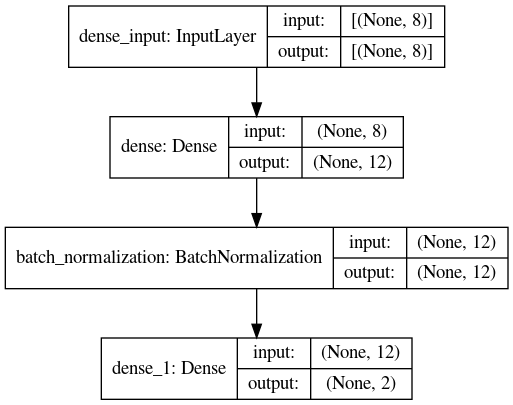

In [64]:
plot_model(K_Class(X,y), show_shapes=True, show_layer_names=True)

### Model evaluation

#### Model scoring

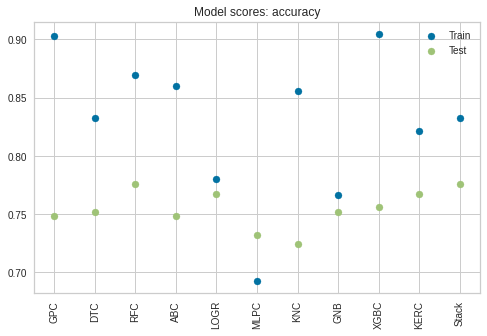

array([['GPC', 0.9027237354085603, 0.7480314960629921],
       ['DTC', 0.8326848249027238, 0.7519685039370079],
       ['RFC', 0.8696498054474708, 0.7755905511811023],
       ['ABC', 0.8599221789883269, 0.7480314960629921],
       ['LOGR', 0.7801556420233463, 0.7677165354330708],
       ['MLPC', 0.6926070038910506, 0.7322834645669292],
       ['KNC', 0.8560311284046692, 0.7244094488188977],
       ['GNB', 0.7665369649805448, 0.7519685039370079],
       ['XGBC', 0.9046692607003891, 0.7559055118110236],
       ['KERC', 0.8210116731517509, 0.7677165354330708],
       ['Stack', 0.8326848249027238, 0.7755905511811023]], dtype=object)

In [65]:
score_stacking_c(model, X_train, y_train, X_test, y_test)

#### ROC/AUC

In [66]:
classes = (y_train.append(y_test)).unique()

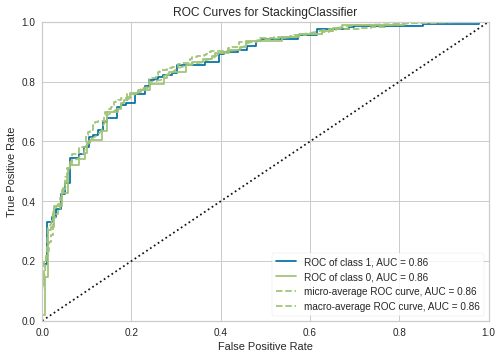

In [67]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

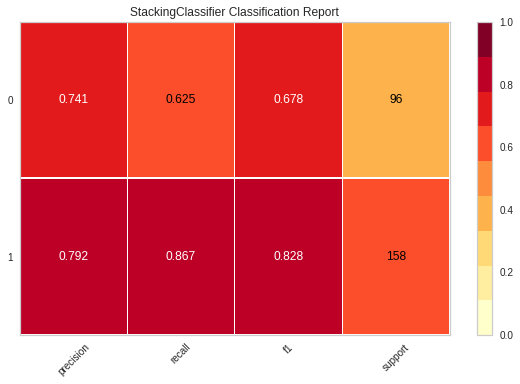

In [68]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

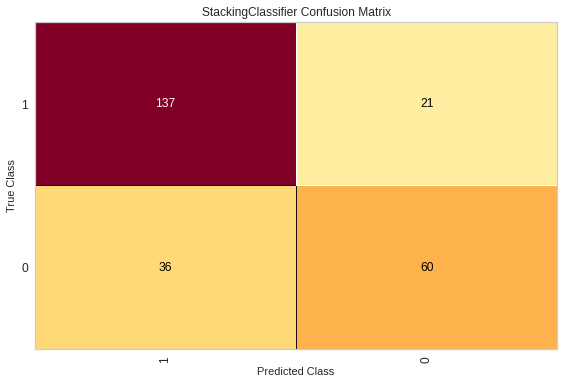

In [69]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

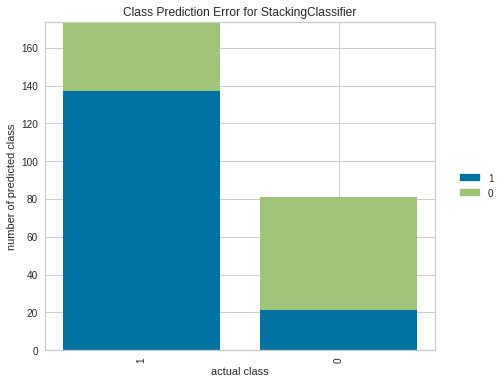

In [70]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);